In [117]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from collections import Counter

In [118]:
iris = datasets.load_breast_cancer()
X, y = iris.data, iris.target

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

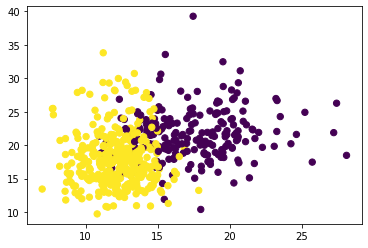

In [120]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40)

In [121]:
def euclidean_distance(features, other_features):
    return np.sqrt(np.sum((features-other_features) ** 2))

class KNN: 
    
    def __init__(self, k=3):
        self.k = k
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def predict(self, X):
        predicted_labels = [self._predict(x) for x in X]
        return np.array(predicted_labels)
    
    def _predict(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

In [122]:
clf = KNN(k=3)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [124]:
confusion_matrix(y_test, predictions)

array([[38,  5],
       [ 3, 68]], dtype=int64)